# 0.0 IMPORTS


In [1]:
import pandas as pd
import inflection
import  math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import datetime

## 0.1 Helper Functions

### 0.2 Loading Data

In [2]:
df_sales_raw= pd.read_csv('Data/train.csv',low_memory=False)
df_store_raw= pd.read_csv('Data/store.csv',low_memory=False)

#merge
df_raw  = pd.merge(df_sales_raw,df_store_raw,how='left',on='Store')

# 1.0 DESCRIÇÃO DOS DADOS

In [3]:
df1 = df_raw.copy()

In [4]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase= lambda x : inflection .underscore(x)

cols_new= list(map( snakecase, cols_old ))

#  Rename
df1.columns= cols_new

## 1.2. Data Dimension

In [6]:
print( 'number of rows: {}'.format( df1.shape[0]))
print( 'number of columns: {}'.format( df1.shape[1]))

number of rows: 1017209
number of columns: 18


## 1.3. Data Type

In [7]:
df1['date']= pd.to_datetime(  df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [8]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [9]:
#competition_distance 

df1['competition_distance']= df1['competition_distance'].apply(lambda x:  200000.0 if math.isnan (x) else x)

#competition_open_since_month  

df1['competition_open_since_month']=df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)


#competition_open_since_year     

df1['competition_open_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)


#promo2_since_week 


df1['promo2_since_week']=df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)


#promo2_since_year


df1['promo2_since_year']=df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)


#promo_interval

month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df1['promo_interval'].fillna(0,inplace=True)

df1['month_map']=df1['date'].dt.month.map(month_map) 

df1['is_promo']=df1[['promo_interval','month_map']].apply( lambda x:0 if x['promo_interval']== 0 
                                                          else 1 if x ['month_map'] in x ['promo_interval'].split(',') else 0 , axis= 1 )




In [10]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0


In [11]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [12]:
df1['competition_open_since_month']= df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']= df1['competition_open_since_year'].astype(int)

df1['promo2_since_week']= df1['promo2_since_week'].astype(int)
df1['promo2_since_year']= df1['promo2_since_year'].astype(int)

## 1.7. Descriptive Estatistical

In [13]:
num_attributes= df1.select_dtypes(include = ['int64', 'float64'])

cat_attributes= df1.select_dtypes(exclude = ['int64', 'float64','datetime64[ns]'])

## 1.7.1  Numerical Attributes

In [14]:
# Central tendency - mean, median


ct1=pd.DataFrame(num_attributes.apply(np.mean) ).T
ct2=pd.DataFrame(num_attributes.apply(np.median) ).T


# Dispersion - std, min, max, range, skew, kurtosis

d1=pd.DataFrame(num_attributes.apply (np.std) ).T
d2=pd.DataFrame(num_attributes.apply (min ) ).T
d3=pd.DataFrame(num_attributes.apply (max ) ).T
d4=pd.DataFrame(num_attributes.apply(lambda x: x.max()  - x.min()  ) ).T
d5=pd.DataFrame(num_attributes.apply(lambda x: x.skew ( )  )  ).T
d6=pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis () )  ).T


#concatenate

m= pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

m.columns= ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [15]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.165966,0.0,0.372050,1.795644,1.224338


D:\anaconda3\envs\Projeto Rossman\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

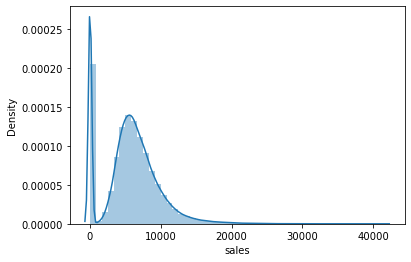

In [16]:
sns.distplot( df1['sales'])

## 1.7.1  Categorical Attributes

In [17]:
cat_attributes.apply (lambda x : x.unique().shape[0] )

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

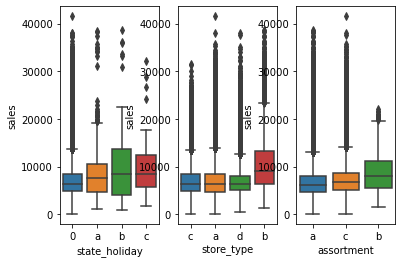

In [18]:
aux1=df1[(df1['state_holiday']!=0 ) & (df1['sales'] > 0)]


plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales',data=aux1 )

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales',data=aux1 )

plt.subplot(1,3,3)
sns.boxplot(x='assortment',y='sales', data=aux1)



# 2.0. FEATURE ENGINEERING 

In [19]:
df2 = df1.copy()

## 2.1. HYPOTHESES MIND MAP

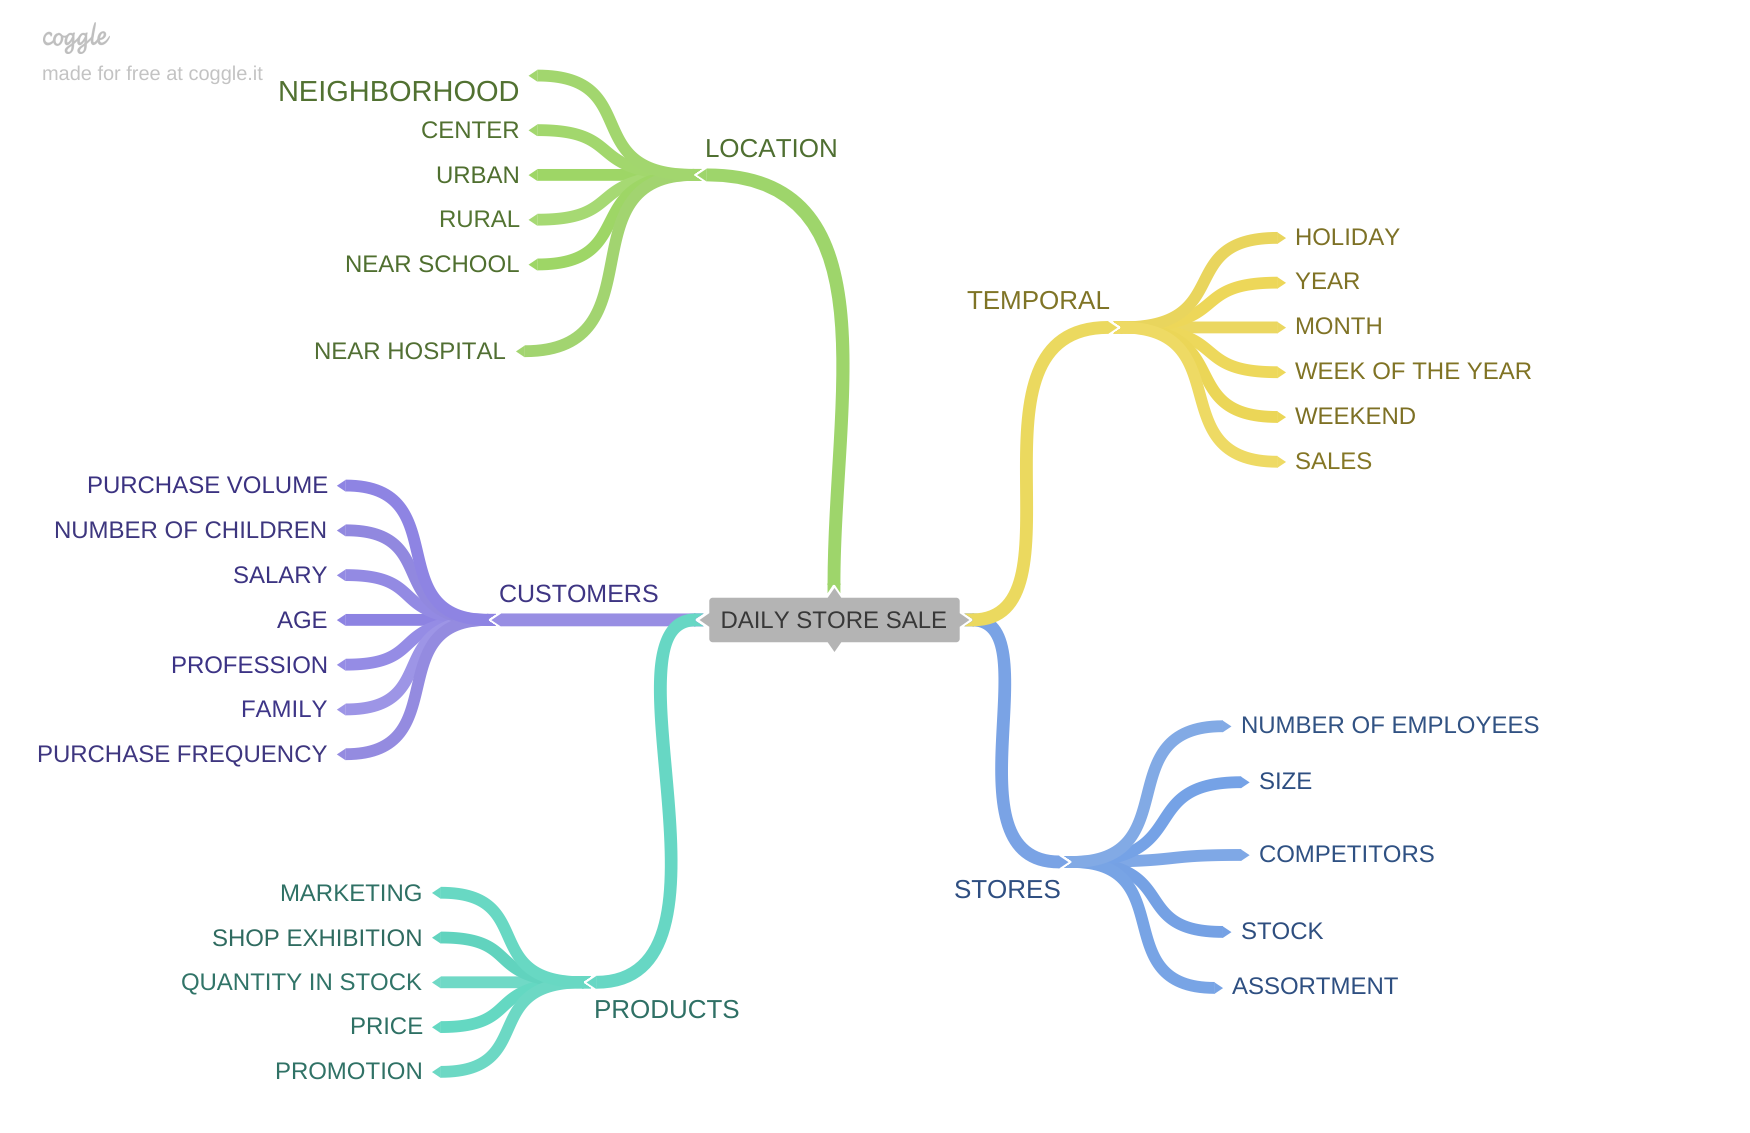

In [20]:
Image ('img/MIND_MAP_HYPOTESIS_DAILY_STORE_SALE.png')

## 2.2 CREATION OF HYPOTHESES

### 2.2.1 HYPOTESES SHOP 

**1.** Larger stores should sell more

**2.** Stores with a larger staff should sell more

**3.** Stores with fewer competitors should sell more.

**4.** Stores with a larger stock should sell more.

**5.** Stores with a larger assortment should sell more.

**6.** Stores with longer competitors should sell more. 

### 2.2.2 HYPOTESES PRODUCTS

**1.** Stores with a greater marketing should sell more.

**2.** Stores that exhibit more product sell more.

**3.** Stores with a fewer price shoul sells more.

**4.** Stores with a fewer price for longer should sell more. 

**5.** Stores whith extended promotion should sell more.

**6.** Stores with consecutive promotions should sell more.




### 2.2.3 HYPOTESES TEMPORAL

**1.** Stores with more holydays should sell less.

**2.** Stores that open in the first 6 months should sell more.

**3.** Stores that open on wekkend should sell more.

**4.** Stores should sell more after 10 day of the month.

**5.** Stores should sell less during scool holidays.

**7.** Stores should sell more over the years.

**8.** Stores that open on Christmas should sell more.

**9.** Stores should sell less during wekkend.

**10.** Stores should sell more in the second half in the year.

## 2.3. Final list of hypotheses

**1.** Stores with a larger assortment should sell more.

**2.** Stores with longer competitors should sell more.

**3.** Stores with fewer competitors should sell more.

**4.** Stores whith extended promotion should sell more.

**5.** Stores with consecutive promotions should sell more.

**6.** Stores that open on Christmas should sell more.

**7.** Stores should sell more over the years.

**8.** Stores should sell more in the second half in the year.

**9.** Stores should sell more after 10 day of the month.

**10.** Stores should sell less during wekkend.

**11.** Stores should sell less during scool holidays.














## 2.4. FEATURE ENGINEERING

In [21]:
# YEAR
df2['year']=df2['date'].dt.year

# MONTH
df2['month']=df2['date'].dt.month    
    
# DAY
df2['day']=df2['date'].dt.day

# WEEK OF YEAR
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# YEAR WEEK
df2['year_week']=df2['date'].dt.strftime('%Y-%W')

# COMPETITION SINCE
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'] , month = x['competition_open_since_month'] ,day = 1), axis = 1)         
df2['competition_time_month']=(( df2['date'] - df2['competition_since']) / 30 ).apply( lambda x: x.days).astype(int)

# PROMO SINCE

df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x:datetime.datetime.strptime(x + '-1','%Y-%W-%w')
                                                        - datetime.timedelta( days= 7 ))

## Promo since
#df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
#df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime
   #                                           (x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
#df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


#df2['promo_time_week'] = ( ( df2['date']-df2['promo_since'] ) / 7  ).apply (lambda x: x.days).astype ( int )


#ASSORTMENT

df2['assortment'] = df2['assortment'].apply(lambda x:  'basic' if x == 'a' else 'extra' if x == 'b' else 'extended') 

#STATE HOLIDAY

df2['state_holiday'] = df2['state_holiday'].apply( lambda x : 'Public Holiday' if x == 'a' else 'Easter holiday' if  x== 'b' else 'Christmas')



# 3.0. FILTERING VARIABLES

In [22]:
df3= df2.copy()

## 3.1.  LINE FILTERING

In [24]:
df3 =df3[ ( df3['open']  != 0 ) & ( df3['sales']  > 0 )] 

## 3.2. COLOMN SELECTION

In [25]:
cols_drop = ['customers','open','promo_interval','month_map']
df3= df3.drop(cols_drop,axis=1)

# 4.0. FILTERING VARIABLES